In [7]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/dhawal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df = pd.read_csv("yelp.csv")


### Coversion in lower case ###

In [9]:
df['text'] = df['text'].str.lower()

### Removal of stop words

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
# print(len(stop))
stop=stop[0:144]
# print(stop)

In [11]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# df

In [ ]:
texts = df['text']
# texts
stars = df['stars']
# stars

#### REASON FOR BALANCING CAN BE SEEN BY GRAPH SHOWING VARIATION IN COLLECTION OF RATING COUNT ###$

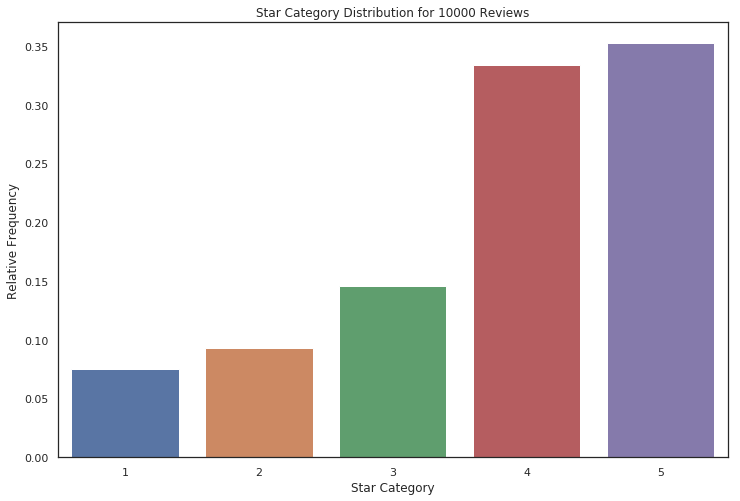

In [13]:
N_star_categories = 5
colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329'])
stars_labels = np.array(range(N_star_categories)) + 1;
#star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories) 
star_category_absolute_frequencies = df.stars.value_counts(ascending=True);
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))
sns.set()
sns.set(style="white")
fig2 = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
ax.set_xlabel('Star Category');
ax.set_ylabel('Relative Frequency');
ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df)));

we’ll get less biased predictions if we train the system on balanced data. This means that ideally we should have the same number of examples of each review type.

In [ ]:
def balance_classes(xs, ys):
    
    freqs = Counter(ys)

    # the least common class is the maximum number we want for all classes
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    return new_xs, new_ys

In [ ]:
print(Counter(stars))
balanced_x, balanced_y = balance_classes(texts, stars)
print(Counter(balanced_y))

### TF-IDF ###


In [ ]:
#This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(balanced_x)

In [ ]:
# print(vectors)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectors, balanced_y, test_size=0.33, random_state=42)

In [ ]:
# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

In [ ]:
preds = classifier.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

In [ ]:
print(accuracy_score(y_test, preds))

In [ ]:
confusion_matrix(y_test, preds)